# Intro

`1` 모델링 결과 XGB 모델을 적합했을 경우 가장 예측 성능이 좋았음

`2` Hyperparameter tuning 기법과 Selection 기법을 사용해 최종 모델링 수행

- Hyperparameter Tuning: AI 모델 학습시 매개변수를 조정하여 최상의 성능을 발휘하는 매개변수를 찾는 기법
- Feature Selection: 모델링 시 raw data의 562개나 되는 모든 feature를 사용하는 것은 computing power와 memory 측면에서 매우 비효율적이기 때문에 결과 예측에 영향도가 높은 중요 feature만 선택하여 자원을 절약하고 모델의 성능을 높이는 기법

# 0. import

In [1]:
# | code-fold : true
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import os
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

plt.rc('font', family='Malgun Gothic')

# 1. 데이터 로드

In [2]:
data = pd.read_csv("data.csv")
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS


`-` 불필요한 컬럼 제거

* `subject`열 은 데이터를 수집한 사람을 구별하기 위한 데이터

In [3]:
data.drop("subject", axis = 1,inplace = True)
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.535287,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.004012,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.157832,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,WALKING_DOWNSTAIRS


`-` 이전에 저장한 모델링 결과파일 로드

In [5]:
result = pd.read_csv("result3.csv")
result

,model_name,valid_data,accuracy_score,F1_score
0,lr,train,0.984136,0.985601
1,knn,train,0.954674,0.958345
2,gbc,train,0.981870,0.983141
3,xgb,train,0.990368,0.991178


# 2. Hyperparameter Tuning

## (1) 라이브러리 호출

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

## (2) X,y 데이터 나누기

In [7]:
target = "Activity"

x = data.drop(target, axis = 1)
y = data[target]

## (3) Encoding

In [8]:
dic = {'STANDING':0, 'SITTING':1, 'LAYING':2, 'WALKING':3, 'WALKING_UPSTAIRS':4, 'WALKING_DOWNSTAIRS':5}
y_map = [dic[i] for i in y]
y_map[:5]

[0, 2, 0, 3, 5]

## (4) train, test data 분리

In [10]:
x_train, x_val, y_train, y_val = train_test_split(x, y_map, random_state = 2023, test_size = 0.3)

## (5) 최적의 Hyperparameter 찾기

In [11]:
params = {'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [2, 3, 4]}
xgb_model = XGBClassifier(random_state = 2023 )

hpt_xgb_model = GridSearchCV(estimator= xgb_model , param_grid= params, cv=3, verbose=2)

hpt_xgb_model.fit(x_train, y_train)

hpt_xgb_pred = hpt_xgb_model.predict(x_val)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .....................learning_rate=0.1, max_depth=2; total time=   6.6s
[CV] END .....................learning_rate=0.1, max_depth=2; total time=   6.8s
[CV] END .....................learning_rate=0.1, max_depth=2; total time=   6.8s
[CV] END .....................learning_rate=0.1, max_depth=3; total time=   9.1s
[CV] END .....................learning_rate=0.1, max_depth=3; total time=   9.3s
[CV] END .....................learning_rate=0.1, max_depth=3; total time=   9.5s
[CV] END .....................learning_rate=0.1, max_depth=4; total time=  11.8s
[CV] END .....................learning_rate=0.1, max_depth=4; total time=  11.9s
[CV] END .....................learning_rate=0.1, max_depth=4; total time=  12.2s
[CV] END .....................learning_rate=0.2, max_depth=2; total time=   7.2s
[CV] END .....................learning_rate=0.2, max_depth=2; total time=   7.4s
[CV] END .....................learning_rate=0.2, 

## (6) 결과 확인 및 저장

`-` 최적의 파라미터 확인

In [12]:
params = hpt_xgb_model.best_params_
params

{'learning_rate': 0.3, 'max_depth': 2}

`-` 정확도 확인

In [13]:
accuracy_score(y_val,hpt_xgb_pred)

0.9920679886685553

In [14]:
hpt_xgb_model = XGBClassifier(learning_rate=0.3, max_depth = 2,random_state=2023)
hpt_xgb_model.fit(x_train,y_train)
hpt_xgb_pred = hpt_xgb_model.predict(x_val)
hpt_xgb_pred

array([3, 0, 2, ..., 3, 3, 2], dtype=int64)

In [15]:
result.loc[5] = ["hpt_xgb", "train", 
                 accuracy_score(y_val, hpt_xgb_pred), 
                 f1_score(y_val, hpt_xgb_pred, average = "macro")]
result

,model_name,valid_data,accuracy_score,F1_score
0,lr,train,0.984136,0.985601
1,knn,train,0.954674,0.958345
2,gbc,train,0.981870,0.983141
3,xgb,train,0.990368,0.991178
5,hpt_xgb,train,0.992068,0.992707


# 3. Feature Selection

`1` 변수 중요도 상위 150개, 50개의 feature를 선별하여 모델을 학습

## (1) 변수 중요도 산출

In [16]:
imp = hpt_xgb_model.feature_importances_
f_name = hpt_xgb_model.feature_names_in_

In [17]:
importance_sort = pd.DataFrame({"feature_name" : f_name, 
                                "feature_importance" : imp})
importance_sort.head()

,feature_name,feature_importance
0,tBodyAcc-mean()-X,0.000000
1,tBodyAcc-mean()-Y,0.000721
2,tBodyAcc-mean()-Z,0.000000
3,tBodyAcc-std()-X,0.000366
4,tBodyAcc-std()-Y,0.000000


In [19]:
importance_sort.sort_values("feature_importance", ascending = False, inplace = True)
importance_sort.head()

,feature_name,feature_importance
558,"angle(X,gravityMean)",0.114671
201,tBodyAccMag-std(),0.101686
296,fBodyAcc-skewness()-X,0.065176
503,fBodyAccMag-std(),0.042554
73,"tGravityAcc-arCoeff()-Z,1",0.040255


In [21]:
importance_sort.reset_index(drop = True, inplace = True)
#importance_sort

## (2) 중요 feature 150개 선정

In [29]:
importance_150 = importance_sort["feature_name"][:150]
importance_150.head()

0         angle(X,gravityMean)
1            tBodyAccMag-std()
2        fBodyAcc-skewness()-X
3            fBodyAccMag-std()
4    tGravityAcc-arCoeff()-Z,1
Name: feature_name, dtype: object

In [23]:
x_train_150 = x_train[importance_150]
x_val_150 = x_val[importance_150]

### a. 모델링

In [24]:
hpt_xgb_150_model = XGBClassifier(params, random_state = 2023)
hpt_xgb_150_model.fit(x_train_150,y_train)
hpt_xgb_150_pred = hpt_xgb_150_model.predict(x_val_150)
hpt_xgb_150_pred

C:\Users\rkdcj\anaconda3\envs\dx\Lib\site-packages\xgboost\core.py:726: FutureWarning:

Pass `objective` as keyword args.



array([3, 0, 2, ..., 3, 3, 2], dtype=int64)

### b. 예측 성능 결과 저장

In [25]:
result.loc[7] = ["hpt_xgb_150", "train", 
             accuracy_score(y_val,hpt_xgb_150_pred),
             f1_score(y_val, hpt_xgb_150_pred, average = "macro")]

In [26]:
result

,model_name,valid_data,accuracy_score,F1_score
0,lr,train,0.984136,0.985601
1,knn,train,0.954674,0.958345
2,gbc,train,0.981870,0.983141
3,xgb,train,0.990368,0.991178
5,hpt_xgb,train,0.992068,0.992707
7,hpt_xgb_150,train,0.989235,0.989286


## (3) 중요 feature 50개 선정

In [28]:
importance_50 = importance_150[:50]
importance_50.head()

0         angle(X,gravityMean)
1            tBodyAccMag-std()
2        fBodyAcc-skewness()-X
3            fBodyAccMag-std()
4    tGravityAcc-arCoeff()-Z,1
Name: feature_name, dtype: object

### a. 모델링

In [30]:
x_train_50 = x_train[importance_50]
x_val_50 = x_val[importance_50]

In [31]:
hpt_xgb_50_model = XGBClassifier(params, random_stat = 2023)
hpt_xgb_50_model.fit(x_train_50, y_train)
hpt_xgb_50_pred = hpt_xgb_50_model.predict(x_val_50)
hpt_xgb_50_pred

C:\Users\rkdcj\anaconda3\envs\dx\Lib\site-packages\xgboost\core.py:726: FutureWarning:

Pass `objective` as keyword args.

C:\Users\rkdcj\anaconda3\envs\dx\Lib\site-packages\xgboost\core.py:160: UserWarning:

[17:47:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "random_stat" } are not used.




array([3, 0, 2, ..., 3, 3, 2], dtype=int64)

### b. 예측 성능 결과 저장

In [32]:
result.loc[8] = ["hpt_xgb_50", "train", 
             accuracy_score(y_val,hpt_xgb_50_pred),
             f1_score(y_val, hpt_xgb_50_pred, average = "macro")]


In [33]:
result

,model_name,valid_data,accuracy_score,F1_score
0,lr,train,0.984136,0.985601
1,knn,train,0.954674,0.958345
2,gbc,train,0.981870,0.983141
3,xgb,train,0.990368,0.991178
5,hpt_xgb,train,0.992068,0.992707
7,hpt_xgb_150,train,0.989235,0.989286
8,hpt_xgb_50,train,0.988102,0.988090


## (4) 결과 시각화

In [44]:
result.melt(id_vars = ["model_name"], 
            value_vars= ["accuracy_score", "F1_score"])

,model_name,variable,value
0,lr,accuracy_score,0.984136
1,knn,accuracy_score,0.954674
2,gbc,accuracy_score,0.981870
3,xgb,accuracy_score,0.990368
4,hpt_xgb,accuracy_score,0.992068
5,hpt_xgb_150,accuracy_score,0.989235
6,hpt_xgb_50,accuracy_score,0.988102
7,lr,F1_score,0.985601
8,knn,F1_score,0.958345
9,gbc,F1_score,0.983141


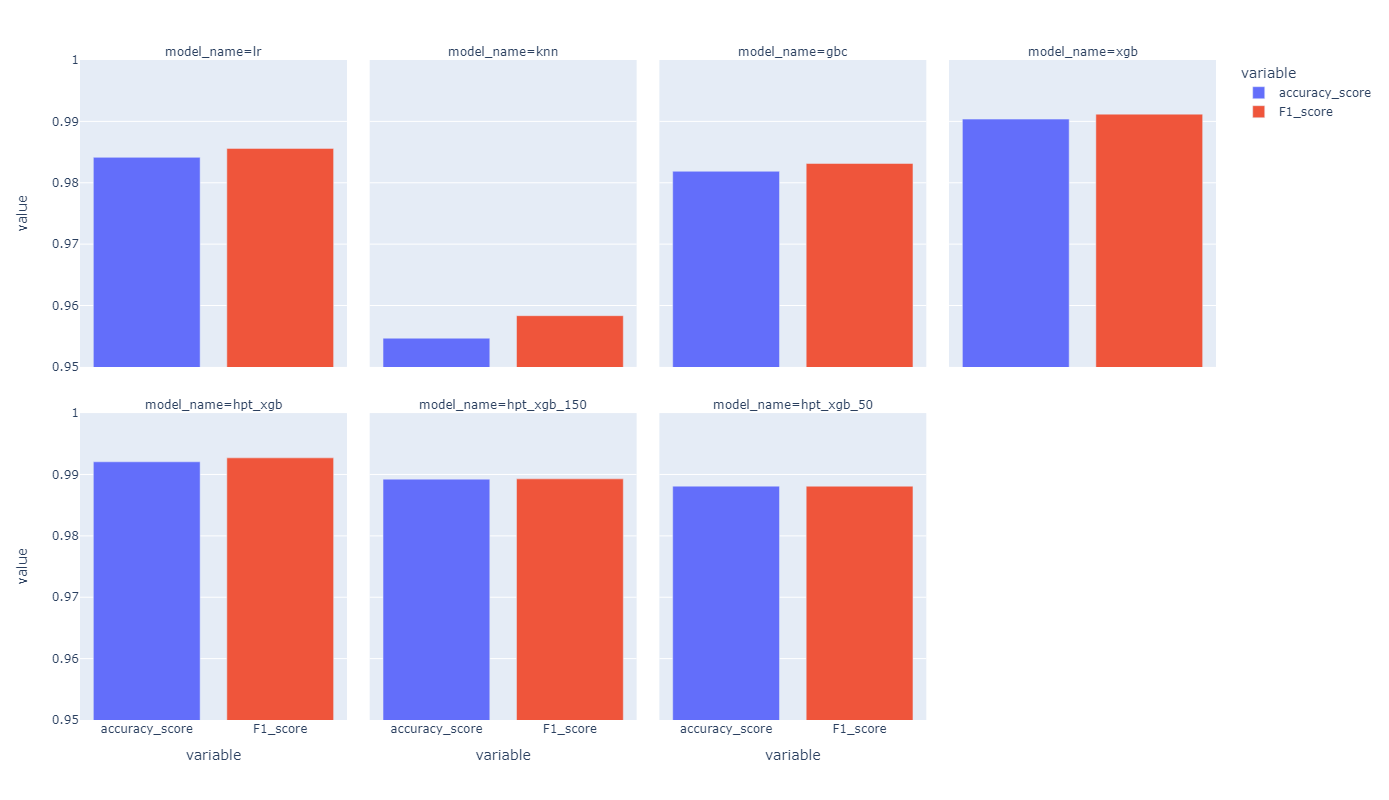

In [52]:
fig = result.melt(id_vars = ["model_name"], 
            value_vars= ["accuracy_score", "F1_score"]).\
                plot(x = "variable", y = "value", 
                     color = "variable", kind = "bar", 
                     backend = "plotly", facet_col = "model_name", facet_col_wrap = 4,
                     width = 1200, height = 800)

fig.update_yaxes(range = (0.95, 1.0))

## (5) model save

`-` 최적의 성능을 보인 모델저장

*  `hpt_xgb` 모델저장

In [54]:
import joblib

joblib.dump(hpt_xgb_model, "hpt_xgb_top_model.pkl")

['hpt_xgb_top_model.pkl']

* 저장한 모델 로드

In [56]:
final_model = joblib.load("hpt_xgb_top_model.pkl")

In [58]:
final_pred = final_model.predict(x_val)

In [61]:
dic.items()

dict_items([('STANDING', 0), ('SITTING', 1), ('LAYING', 2), ('WALKING', 3), ('WALKING_UPSTAIRS', 4), ('WALKING_DOWNSTAIRS', 5)])

In [63]:
dic_reverse = {j : i for i,j in dic.items()}

In [75]:
pd.Series(final_pred).map(dic_reverse).to

0        WALKING
1       STANDING
2         LAYING
3        SITTING
4         LAYING
          ...   
1760     SITTING
1761    STANDING
1762     WALKING
1763     WALKING
1764      LAYING
Length: 1765, dtype: object